SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

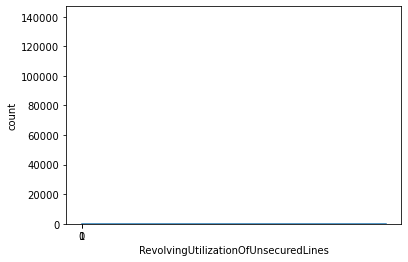

In [1]:
import pandas as pd

import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

# 数据加载
df_train = pd.read_csv('cs-training.csv')
df_train = df_train.iloc[:,1:]
df_train['SeriousDlqin2yrs'].value_counts()
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
df_train['SeriousDlqin2yrs'].sum()/len(df_train)
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

In [2]:
# age分箱
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=age_bins)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [3]:
#NumberOfDependents字段的分箱
dependents_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependents_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [4]:
#分10段，NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',\
         'bin_NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','bin_NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,bin_NumberOfTimes90DaysLate
0,2,"(1.0, 2.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
1,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
2,1,"(-inf, 1.0]",0,"(-inf, 1.0]",1,"(-inf, 1.0]"
3,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
4,1,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
...,...,...,...,...,...,...
149995,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149996,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149997,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149998,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"


In [5]:
#  分5段 即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
loans_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loans_bins)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"


In [6]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [7]:
import numpy as np

# 计算IV
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,val,df[df[feature]==val].count()[feature],\
                   df[(df[feature]==val) & (df[target]==1)].count()[feature]])

    data = pd.DataFrame(lst,columns=cols)
    data = data[data['Bad'] > 0]
    
    data['Share'] = data['All'] / data['All'].sum() 
    data['Bad Rate'] = data['Bad'] / data['All'] 
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe'] * (data['Margin Bad'] - data['Margin Good'])).sum()
    data.sort_values(by = ['Variable','Value'])
    return data['iv'].values[0]

cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [8]:
#计算每个字段的IV值
for f in bin_cols:
    if cal_IV(df_train,f,'SeriousDlqin2yrs') >= 0.1:
        print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887


In [9]:
feature_cols = ['bin_age','bin_NumberOfTime30-59DaysPastDueNotWorse',\
                'bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate',\
               'bin_RevolvingUtilizationOfUnsecuredLines']

In [10]:
def cal_WOE(df,features,target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})

        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

# 计算特征的woe
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')

In [11]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [12]:
# WOE的规则
feature_columns = ['age','NumberOfTime30-59DaysPastDueNotWorse',\
                'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate',\
               'RevolvingUtilizationOfUnsecuredLines']

df_bin_to_woe = pd.DataFrame(columns=['features','bin','woe'])
for f in feature_columns:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe.head()

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848


In [13]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [14]:

# 逻辑回归
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state = 1234)
model = LogisticRegression(random_state=1234).fit(x_train,y_train)
y_pred = model.predict(x_test)

In [15]:
# PDO = 50,B = 72.13
A, B = 650 ,72.13
# 生成评分卡模型
def generate_scorecard(model_coef,binning_df,features,B):
    cols = ['Variable','Binning','Score']
    #模型系数
    coef = model_coef[0]
    # print(coef)
    lst = []
    for i in range(len(features)):
        f = features[i]
        # print(f)
        # 得到feature的woe规则
        df = binning_df[binning_df['features']==f]
        # print(df)
        for index,row in df.iterrows():
            score = int(round(-coef[i] * row['woe'] * B))
            lst.append([f,row['bin'],score])
    data = pd.DataFrame(lst,columns=cols)
    return data
            
        
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_columns,B)
score_card.head()

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-56
1,age,"(25.0, 40.0]",-66
2,age,"(70.0, inf]",-19
3,age,"(50.0, 60.0]",-45
4,age,"(60.0, 70.0]",-28


In [16]:
# 查看规则
sort_scorecard = score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -33  
                                     6         (1.0, 2.0]   -103  
                                     14        (7.0, 8.0]   -117  
                                     15        (8.0, 9.0]   -120  
                                     8         (2.0, 3.0]   -124  
                                     9         (3.0, 4.0]   -140  
                                     10        (4

In [17]:
# 工具
def str_to_int(s):
    if s == '-inf':
        return -999999
    if s == 'inf':
        return 999999
    return float(s)
    
# 计算分数
def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] += A
    df['score'] = df['score'].astype(int)
    return df

# score_card转换为分数
def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score = score + selected_record_in_scorecard['Score'].iloc[0]
    return score

# value映射bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0] == '('
        right_open = bins[-1] == ')'
        binnings = bins[1:-1].split(',')
        in_range = True
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False
        # 检查右括号
        if right_open:
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else:
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row['Binning']
    return null
            

        


In [18]:
# 选择good的5个人
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
# good_sample
good_sample = good_sample[feature_columns]
# 应用评分卡，对sample计算分数
calculate_score_with_card(good_sample,score_card,A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
40951,67,0,0,0,0.000000,517
35882,73,0,0,0,0.103790,520
104393,44,0,0,0,0.066266,491
94715,56,0,0,0,0.514542,474
80879,67,0,0,0,0.698855,491


In [19]:
# 选择bad的5个人
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
# bad_sample
bad_sample = bad_sample[feature_columns]
# 应用评分卡，对sample计算分数
calculate_score_with_card(bad_sample,score_card,A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
77780,45,0,0,0,0.645298,463
41875,76,0,1,0,0.005054,526
127648,46,0,0,2,1.000000,291
13027,24,0,0,0,0.897132,408
130840,53,2,1,3,1.001143,214
